In [81]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [82]:
df = pd.read_csv("data/Maternal Health Risk Data Set.csv")
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [83]:
df.shape

(1014, 7)

In [84]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [85]:
print(df.RiskLevel.value_counts())

RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64


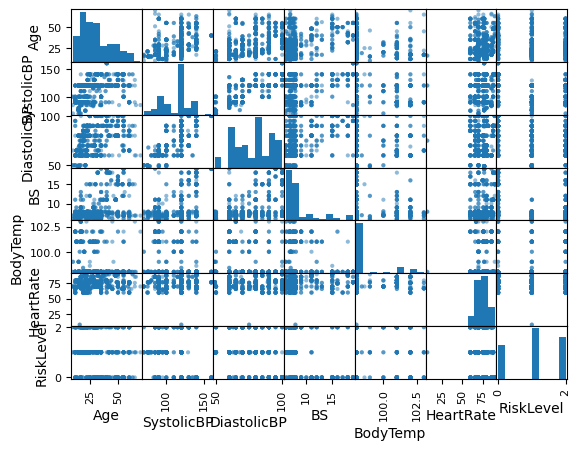

In [86]:
df2 = df.copy()
le = LabelEncoder()
df2.RiskLevel = le.fit_transform(df2.RiskLevel)
scatter_matrix(df2)
plt.savefig('plots/MaternalHealthRisk1.png')
plt.show()

In [87]:
X = df.drop(columns = "RiskLevel")
y = df.RiskLevel
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1) 

In [88]:
print(X.shape)
print(y.shape)

(1014, 6)
(1014,)


In [89]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(709, 6)
(709,)
(305, 6)
(305,)


In [107]:
for d in range(1,20) :
    model = DecisionTreeClassifier(max_depth = d )
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print("d: ", d, " val accuracy: ", scores.mean())

d:  1  val accuracy:  0.5810708220956947
d:  2  val accuracy:  0.6191689141943861
d:  3  val accuracy:  0.6601038857257018
d:  4  val accuracy:  0.6953451203675955
d:  5  val accuracy:  0.7080811107781442
d:  6  val accuracy:  0.7150634302267507
d:  7  val accuracy:  0.7432624113475177
d:  8  val accuracy:  0.7503645989411647
d:  9  val accuracy:  0.7687144141444411
d:  10  val accuracy:  0.7587753471181701
d:  11  val accuracy:  0.7786135251223654
d:  12  val accuracy:  0.8025471980821097
d:  13  val accuracy:  0.8166716611727101
d:  14  val accuracy:  0.8138347817400859
d:  15  val accuracy:  0.818060133852762
d:  16  val accuracy:  0.8067825392068724
d:  17  val accuracy:  0.8124263310358606
d:  18  val accuracy:  0.8152432324443112
d:  19  val accuracy:  0.8081810008990111


In [125]:
model = DecisionTreeClassifier(max_depth = 15)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=15)

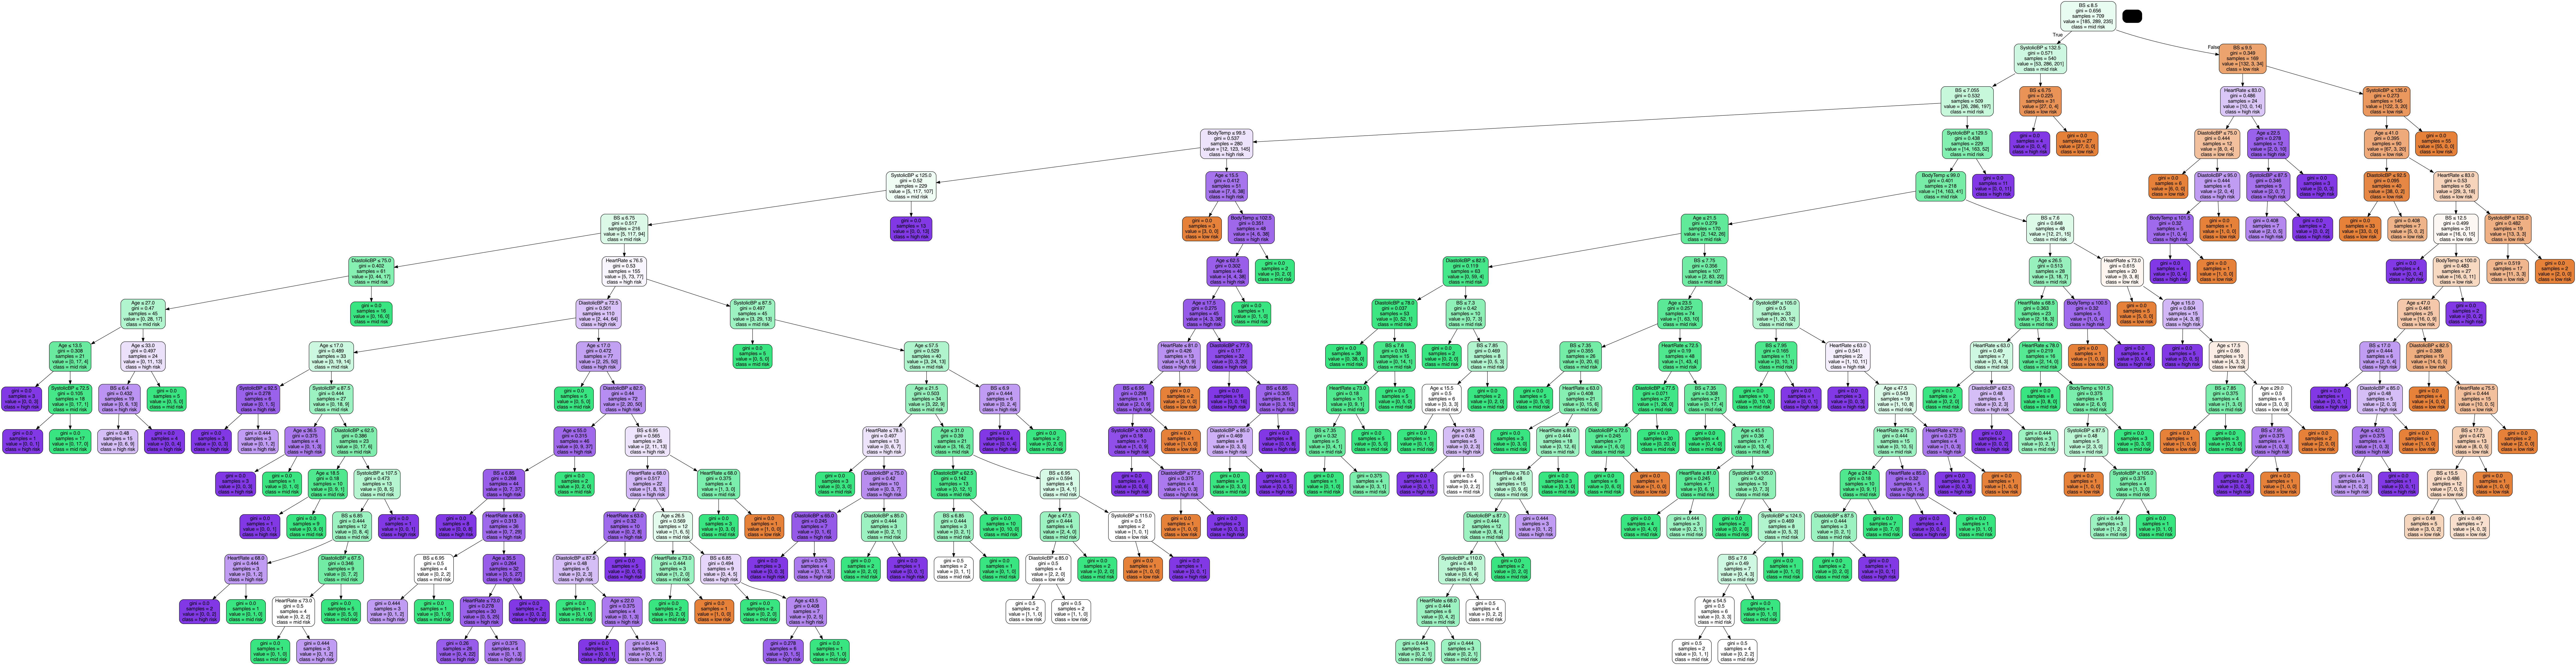

In [126]:
feature_names = ['Age',	'SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate']
target_names = ["RiskLevel"]
dot_data = StringIO()

export_graphviz(model, out_file = dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_names, class_names = ["low risk" , "mid risk" , "high risk"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('plots/MaternalHealthRisk.png')

Image(graph.create_png())

In [115]:
print("Training Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))

Training Accuracy: 0.9294781382228491
Test Accuracy: 0.8065573770491803


In [116]:
y_hat = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_hat))

Test Accuracy: 0.8065573770491803


In [117]:
cm = confusion_matrix(y_test, y_hat)
print(cm)

[[79  5  3]
 [ 4 95 18]
 [12 17 72]]
